# Sangeetha Nesan R

### i) Download the Dataset

In [5]:
!gdown 1Obcp7HUfgqsU4YNmnGSfsvbF37Mivukw
!unzip Animal_Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1Obcp7HUfgqsU4YNmnGSfsvbF37Mivukw
To: /content/Animal_Dataset.zip
100% 65.3M/65.3M [00:00<00:00, 159MB/s]
Archive:  Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: d

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import cv2
import numpy as np

### ii) Image Augmentation

In [26]:
train_path = '/content/dataset/Training'
val_path = '/content/dataset/Testing'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(#vertical_flip = True,
                                                                  horizontal_flip = True,
                                                                  zoom_range = 0.2,
                                                                  width_shift_range = 0.2,
                                                                  height_shift_range = 0.2,
                                                                  rotation_range = 30,
                                                                  fill_mode = 'nearest')

val_generator = tf.keras.preprocessing.image.ImageDataGenerator()

train_gen = train_generator.flow_from_directory(directory = train_path,
                                                target_size = (412, 412),
                                                seed = 42)

val_gen = train_generator.flow_from_directory(directory = val_path,
                                              target_size = (412, 412),
                                              seed = 42)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


### iii) Model Building

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(412, 412, 3)))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 410, 410, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 205, 205, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 203, 203, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 101, 101, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 99, 99, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0

### iv) Model Compilation

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### v) Model Fit

In [ ]:
history = model.fit(train_gen,
                    validation_data = val_gen,
                    steps_per_epoch = (1238 // 32) + 1,
                    validation_steps = (326 // 32) + 1,
                    epochs = 50)

Epoch 1/50
39/39 [==============================] - 68s 2s/step - loss: 2.1423 - accuracy: 0.3393 - val_loss: 1.5950 - val_accuracy: 0.3650
Epoch 2/50
39/39 [==============================] - 60s 2s/step - loss: 1.4298 - accuracy: 0.3982 - val_loss: 1.4871 - val_accuracy: 0.4110
Epoch 3/50
39/39 [==============================] - 59s 2s/step - loss: 1.2316 - accuracy: 0.4733 - val_loss: 1.0587 - val_accuracy: 0.5276
Epoch 4/50
39/39 [==============================] - 59s 2s/step - loss: 1.1466 - accuracy: 0.5040 - val_loss: 1.0791 - val_accuracy: 0.5552
Epoch 5/50
39/39 [==============================] - 59s 1s/step - loss: 1.0964 - accuracy: 0.5250 - val_loss: 0.9811 - val_accuracy: 0.5828
Epoch 6/50
39/39 [==============================] - 59s 2s/step - loss: 1.1146 - accuracy: 0.5250 - val_loss: 0.9372 - val_accuracy: 0.6043
Epoch 7/50
39/39 [==============================] - 59s 2s/step - loss: 1.0085 - accuracy: 0.5646 - val_loss: 0.9271 - val_accuracy: 0.6350
Epoch 8/50
39/39 [==

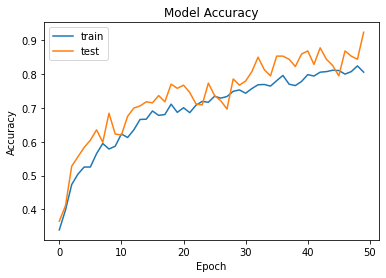

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

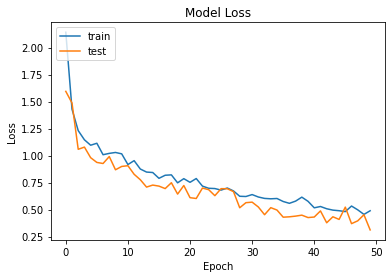

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### vi) Save the Model

In [ ]:
model.save('animal_classifier.h5')

### vii) Test the Model

In [24]:
sample_imgs = []
val_path = '/content/dataset/Testing'


for img_class in os.listdir(val_path):
  imgs = os.listdir(os.path.join(val_path, img_class))
  random.shuffle(imgs)
  for img in imgs[:3]:
      img = cv2.imread(os.path.join(val_path, img_class, img))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, (412, 412))
      img = img / 255.
      sample_imgs.append(img)

sample_imgs = np.stack(sample_imgs, axis=0)
model = tf.keras.models.load_model('animal_classifier.h5')
y_pred = model.predict(sample_imgs)
y_pred = np.argmax(y_pred, axis=1)

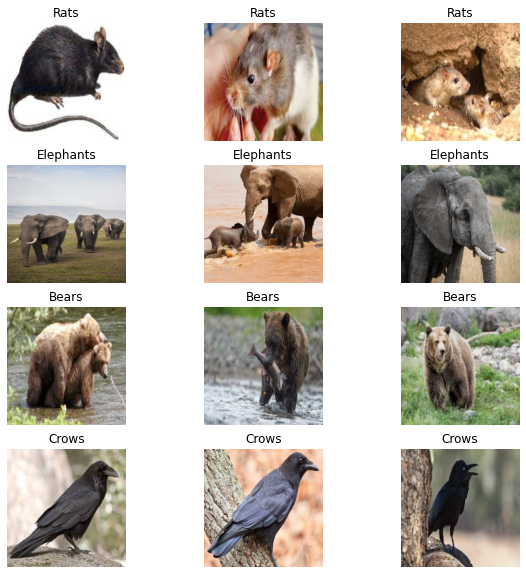

In [43]:
fig = plt.figure(figsize=(10, 10))
class_indices = list(train_gen.class_indices.keys())
l = []
c = -1
for index, img in enumerate(sample_imgs):
    fig.add_subplot(4, 3, index + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_indices[y_pred[index]])